In [1]:
from itertools import cycle, product

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-colorblind')

In [20]:
def test_c_cycle(length=6): 
    fig = plt.figure(constrained_layout=True, figsize=(20, 12))
    gs = fig.add_gridspec(4,3)

    axtl = fig.add_subplot(gs[0, 0])
    axtm = fig.add_subplot(gs[0, 1])
    axtr = fig.add_subplot(gs[0, 2])

    axm = fig.add_subplot(gs[1, :])
    axb = fig.add_subplot(gs[2, :], sharex=axm)
    
    cbarax = fig.add_subplot(gs[3, :])

    lines = ["-",":","--","-."]
    linecycler = cycle(lines)

    color = [f"C{n}" for n in range(0, length)]
    colorcycler = cycle(color)

    alpha = [(i)/9 for i in range(3, 9)]
    alpha_cycle = cycle(product(lines, alpha))

    style_cycler = cycle(product(lines, color))

    for i, c in zip(range(length), colorcycler):
        axtl.plot([i,i+1], [0, 20], c=c, linewidth=8)

    for i, s in zip(range(4), linecycler):
        axtm.plot([i,i+1], [0, 20], linestyle=s, c="C0", linewidth=8)

    for i, a in zip(range(6), cycle(alpha)):
        axtr.plot([i,i+1], [0, 20], c="C0", linewidth=8, alpha=a)

    for i, (s, c) in zip(range(24), style_cycler):
        axm.plot([i,i+1], [0, 20], linestyle=s, c=c, linewidth=8)

    for i, (s, a) in zip(range(24), alpha_cycle):
        axb.plot([i,i+1], [0, 20], linestyle=s, c="C0", linewidth=8, alpha=a)
    
    cm = LinearSegmentedColormap.from_list("DarkForest", colour_bar, N=1000)
    data = np.arange(10000, 0, -1).reshape(100, 100)

    im = cbarax.pcolormesh(data, cmap=cm)
    fig.colorbar(im, cax=cbarax, orientation='horizontal')

    

In [21]:
#colours = ["74080e","8a3c38","a06f61","b6a38a","cbd6b3","7cb08f","2c896a","1c5a40","14432b","0c2b16"]
colours = ["74080e","6b191a","622925","50493c","3e6953","2c896a","247255","1c5a40","14432b","0c2b16"]
colour_bar = [(116/255, 8/255, 14/255), (62/255, 105/255, 83/255), (12/255, 43/255, 22/255)]

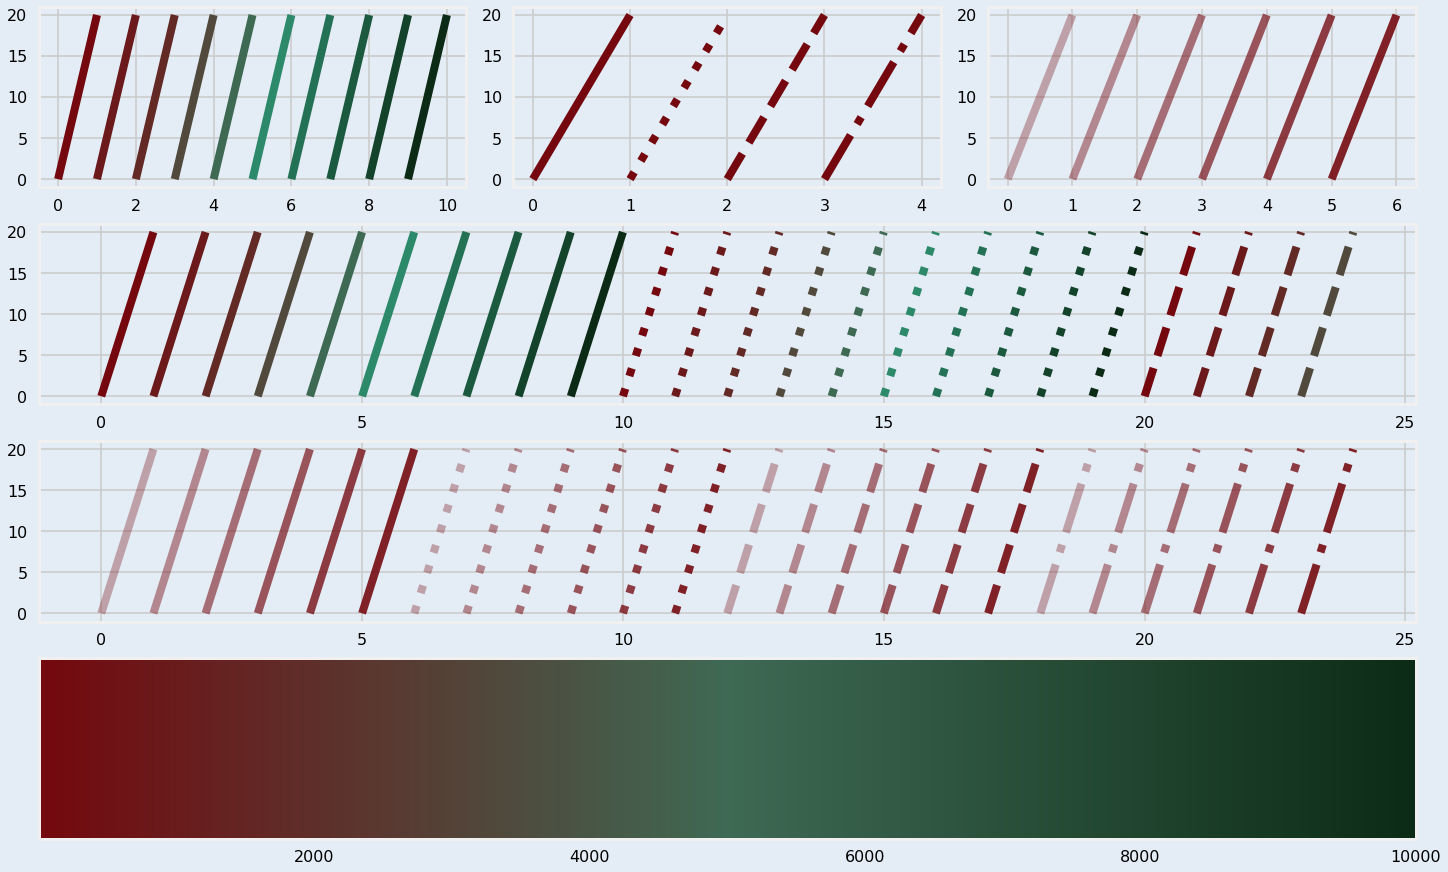

In [22]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
mpl.rcParams['figure.facecolor'] = 'E4EDF6'
mpl.rcParams['axes.facecolor'] = 'E4EDF6'

test_c_cycle(length=len(colours))

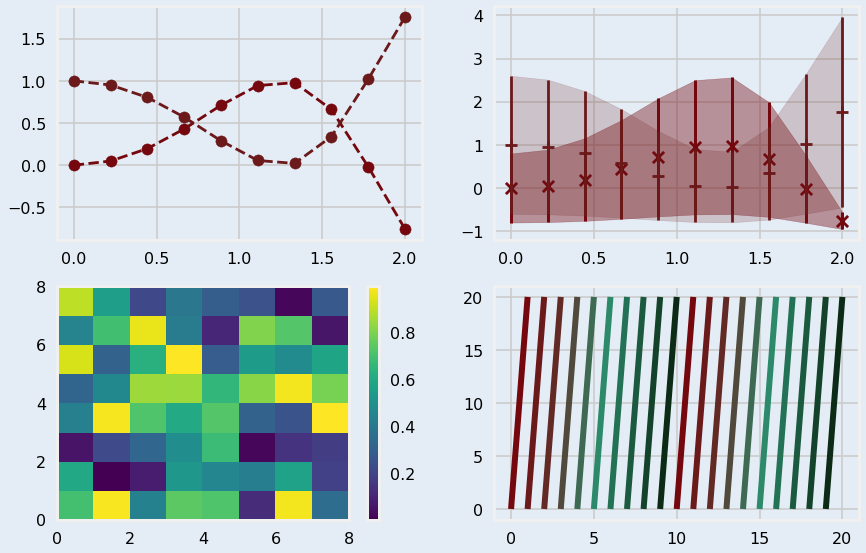

In [23]:
def example_plot_grid(title=None):
    
    x = np.linspace(0, 2, 10)
    y1 = np.sin(x ** 2)
    y2 = 1-y1
    
    z = np.random.uniform(0,1,(8,8))

    fig, axs = plt.subplots(2,2)
    
    fig.suptitle(title)

    axs[0, 0].scatter(x, y1)
    axs[0, 0].plot(x, y1, linestyle="--")
    axs[0, 0].scatter(x, y2)
    axs[0, 0].plot(x, y2, linestyle="--")

    y_error = (y1+1)*0.8
    axs[0, 1].scatter(x, y1, marker="x", c="C0")
    axs[0, 1].errorbar(x, y1, yerr=y_error, linestyle="None", marker="x", elinewidth=3, c="C0")
    axs[0, 1].fill_between(x, y1+y_error, y1-y_error, alpha=0.4, color="C0")

    y_error = (y2+1)*0.8
    axs[0, 1].scatter(x, y2, marker="+", c="C1")
    axs[0, 1].errorbar(x, y2, yerr=y_error, linestyle="None" , marker="x", c="C1")
    axs[0, 1].fill_between(x, y2+y_error, y2-y_error, alpha=0.2, color="C1")
    
    for i in range(20):
        axs[1, 1].plot([i,i+1], [0, 20], linewidth=6)
        
    fig.colorbar(axs[1, 0].pcolormesh(z), ax=axs[1, 0])
    
    plt.show()
    
example_plot_grid()